# Task 0

## Problem 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as mp
import seaborn as sns; sns.set()
df_ge = pd.read_csv('GeneExpression_Baseline.csv')
df_ge.head()

,GeneID,Chr,Start,Stop,CodingLength,BaselineCell_1,BaselineCell_2,BaselineCell_3,BaselineCell_4,BaselineCell_5,...,BaselineCell_183,BaselineCell_184,BaselineCell_185,BaselineCell_186,BaselineCell_187,BaselineCell_188,BaselineCell_189,BaselineCell_190,BaselineCell_191,BaselineCell_192
0,DDX11L1,chr1,11874,14408,1651,61,47,72,77,75,...,39,34,28,25,30,29,92,26,43,33
1,WASH7P,chr1,14362,29370,1769,72,60,79,80,81,...,26,26,19,26,19,22,96,33,32,44
2,FAM138A,chr1,34611,36081,1130,159,182,152,133,147,...,59,64,44,51,47,54,145,57,65,59
3,FAM138F,chr1,34611,36081,1130,64,54,88,92,63,...,24,31,23,19,25,33,86,45,25,20
4,OR4F5,chr1,69091,70008,918,61,57,63,61,69,...,40,41,17,25,27,27,99,31,32,29


### we need multiple cells since if you look at the table and compare their cells, some different genes might by chance have same value for one cell(like cell 1 for first gene and 4th gene). But if we look at all cells instead,then the chance that they are all the same will be almost 0. So biologists need multiple cells to help them distinguish different genes with a higher accuracy.

## Problem 2

In [2]:
list_columns = list(df_ge.columns.values)
num_cells = 0
for i in list_columns:
    if i.startswith('BaselineCell'):
        num_cells += 1
print(str(num_cells) + " cells are sequenced")

192 cells are sequenced


## Problem 3

In [3]:
num_gene = df_ge['GeneID'].nunique()
print(str(num_gene) + " genes are sequenced")

23346 genes are sequenced


## Problem 4

Text(0.5,1,'distribution of genes in chromosomes')

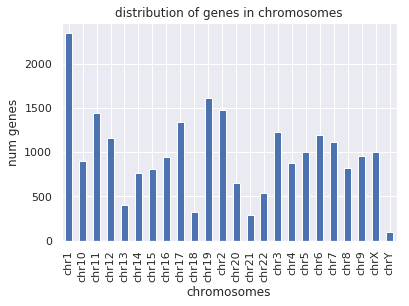

In [4]:
chromo = df_ge.groupby(['Chr']).size()
plot = chromo.plot.bar()
plot.set_xlabel('chromosomes')
plot.set_ylabel('num genes')
plot.set_title('distribution of genes in chromosomes') # set title

### According to the bar graph, the gene is not equally distributed.

## Problem 5

In [5]:
cod = df_ge.groupby(['CodingLength']).size()

Text(0.5,1,'probability distribution of coding length')

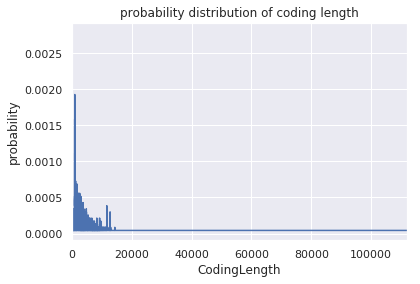

In [6]:
(cod / cod.sum()).plot()
mp.ylabel('probability')
mp.title('probability distribution of coding length')

# Task 1

## Problem 1

### a)

### Let E represents Temperature, T represents Time, V represents Viability, Quality represents Q
### P(Q,V,T,E) = P(Q|V,T,E)* P(V|TE)* P(T|E)* P(E)  (apply chain rule) = P(Q|VT)* P(V|TE)* P(T)* P(E) (by bayesian network)

### b)

### # of parameters for P(Q|V,T) = 2 * 2 = 4

### c)

In [7]:
df_qc= pd.read_csv('QualityControl.csv')
df_qc.head()

,temp,time,viab,qual
0,cool,short,high,good
1,hot,short,low,good
2,warm,short,high,good
3,cool,short,high,bad
4,cool,short,high,good


In [8]:
p_time = df_qc['time'].value_counts()/df_qc['time'].count()
p_time

short    0.9036
long     0.0964
Name: time, dtype: float64

In [9]:
p_temp = df_qc['temp'].value_counts()/df_qc['temp'].count()
p_temp

cool    0.4948
warm    0.3044
cold    0.1050
hot     0.0958
Name: temp, dtype: float64

In [10]:
## P(Viability | Temperature, Time)
p_vgiven = df_qc.groupby(['temp','time'])['viab'].apply(lambda g: g.value_counts()/len(g))
p_vgiven

temp  time       
cold  long   low     0.734694
             high    0.265306
      short  low     0.584034
             high    0.415966
cool  long   high    0.792829
             low     0.207171
      short  high    0.948268
             low     0.051732
hot   long   low     0.928571
             high    0.071429
      short  low     0.787185
             high    0.212815
warm  long   high    0.707143
             low     0.292857
      short  high    0.906657
             low     0.093343
Name: viab, dtype: float64

In [11]:
## P(Quality | Viability, Time)
p_qgiven = df_qc.groupby(['viab','time'])['qual'].apply(lambda g: g.value_counts()/len(g))
p_qgiven

viab  time       
high  long   good    0.522293
             bad     0.477707
      short  good    0.894852
             bad     0.105148
low   long   bad     0.952381
             good    0.047619
      short  good    0.517321
             bad     0.482679
Name: qual, dtype: float64

### d)

### Using bayes rules and chain rule, we can get:
### P(Q | E,T) = P(Q,E,T) / P(E,T)
### P(Q,E,T) = summation(all V) : P(Q | V,T) * P(V | E,T) * P(E) * p(T)
### P(E,T) = P(E) * P(T)
### by this formula, we apply it to all values of temperature and time

In [12]:
temp = df_qc['temp'].unique()
time = df_qc['time'].unique()
var = df_qc['viab'].unique()
qual = df_qc['qual'].unique()

In [13]:
for t in time:
    for e in temp:
        pqet = 0
        pet = p_time[t] * p_temp[e]
        for v in var:
            pqet += p_time[t] * p_temp[e] * p_vgiven[e,t][v] * p_qgiven[v,t]['good']
        print("for time: " + str(t) + " and temp: " + str(e) + " The probability that the quality is good is " + str(pqet/pet))
        print("for time: " + str(t) + " and temp: " + str(e) + " The probability that the quality is bad is " + str(1 - pqet/pet))

for time: short and temp: cool The probability that the quality is good is 0.8753217360140494
for time: short and temp: cool The probability that the quality is bad is 0.12467826398595061
for time: short and temp: hot The probability that the quality is good is 0.5976651674876158
for time: short and temp: hot The probability that the quality is bad is 0.4023348325123842
for time: short and temp: warm The probability that the quality is good is 0.8596122556171399
for time: short and temp: warm The probability that the quality is bad is 0.14038774438286006
for time: short and temp: cold The probability that the quality is good is 0.674361271818892
for time: short and temp: cold The probability that the quality is bad is 0.32563872818110795
for time: long and temp: cool The probability that the quality is good is 0.42395416816204995
for time: long and temp: cool The probability that the quality is bad is 0.57604583183795
for time: long and temp: hot The probability that the quality is goo

In [14]:
df_bib = pd.read_csv('BayesInferenceBase.csv')
df_bim = pd.read_csv('BayesInferenceMetf.csv')

### e)

### From 1.1d, we can find that as long as if time is long, then the quality is bad and if it's short then its quality is good, regardless of thier temp

In [15]:
bad_cell_b = df_bib[df_bib['time'] == 'long']['CellName']
bad_cell_b

184    BaselineCell_185
185    BaselineCell_186
186    BaselineCell_187
187    BaselineCell_188
188    BaselineCell_189
189    BaselineCell_190
190    BaselineCell_191
191    BaselineCell_192
Name: CellName, dtype: object

In [16]:
bad_cell_m = df_bim[df_bib['time'] == 'long']['CellName']
bad_cell_m

184    Metformin_185
185    Metformin_186
186    Metformin_187
187    Metformin_188
188    Metformin_189
189    Metformin_190
190    Metformin_191
191    Metformin_192
Name: CellName, dtype: object

### Bad cells are shown above

## Probelm2

### a)

In [17]:
df_gem = pd.read_csv('GeneExpression_Metformin.csv')

In [18]:
df_gem.drop(df_gem.columns[-9:],1,inplace= True)
df_ge.drop(df_ge.columns[-9:],1,inplace= True) # drop the last 8 cells, which are those bad cells

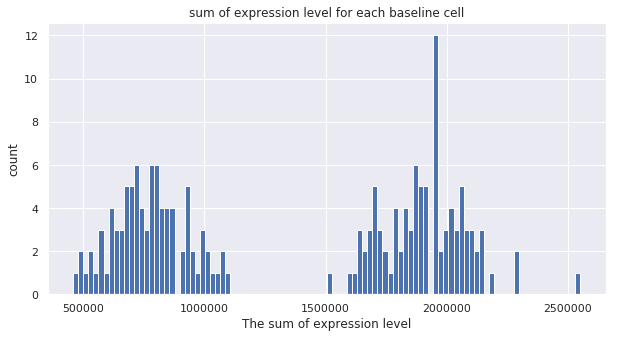

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,5))
df_ge.sum()[5:].plot.hist(bins = 100)
plt.xlabel('The sum of expression level')
plt.ylabel('count')
plt.title('sum of expression level for each baseline cell')
plt.show()

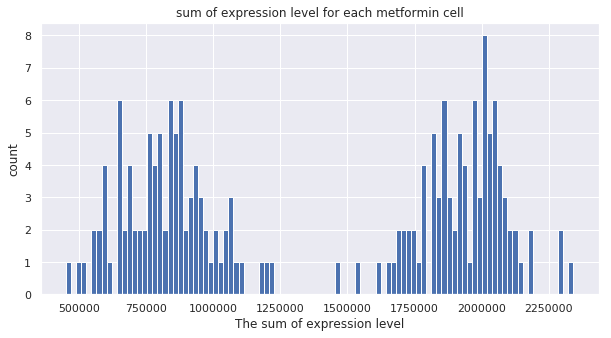

In [20]:
plt.figure(figsize= (10,5))
df_gem.sum()[5:].plot.hist(bins = 100)
plt.xlabel('The sum of expression level')
plt.ylabel('count')
plt.title('sum of expression level for each metformin cell')
plt.show()

### observation: the sum of expression level for both dataset follows a similar bimodal distribution, but the histogram of basline  has a longer tail, which means the data of it has a larger standard deviation

### b)

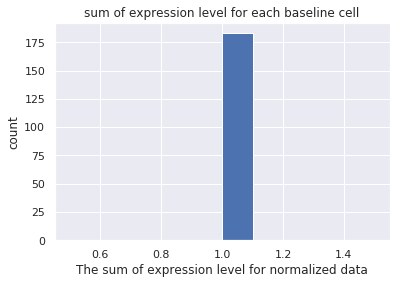

In [21]:
plt.figure()
df_ge_norm = df_ge[df_ge.columns[5:]].div(df_ge[df_ge.columns[5:]].sum(axis=0), axis=1)
round(df_ge_norm.sum()).hist()
plt.xlabel('The sum of expression level for normalized data')
plt.ylabel('count')
plt.title('sum of expression level for each baseline cell')
plt.show()

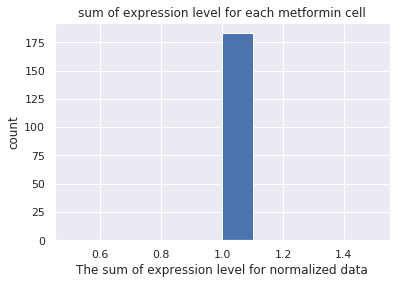

In [22]:
plt.figure()
df_gem_norm = df_gem[df_gem.columns[5:]].div(df_gem[df_gem.columns[5:]].sum(axis=0), axis=1)
plt.hist(x = round(df_gem_norm.sum()))
plt.xlabel('The sum of expression level for normalized data')
plt.ylabel('count')
plt.title('sum of expression level for each metformin cell')
plt.show()

### The histograms only have one bin, as expected

## Problem3

### a)

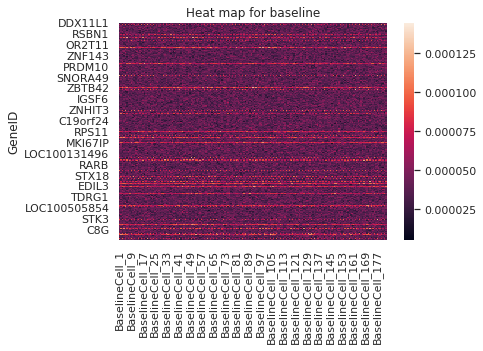

In [23]:
df_ge_norm.index = df_ge['GeneID']
ax = sns.heatmap(df_ge_norm)
plt.title('Heat map for baseline')
figure = ax.get_figure()    
figure.savefig('p1.png', dpi=400)

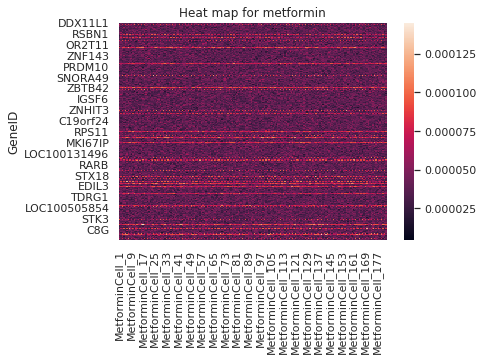

In [24]:
df_gem_norm.index =  df_gem['GeneID']
ax = sns.heatmap(df_gem_norm)
plt.title('Heat map for metformin')
figure = ax.get_figure()    
figure.savefig('p2', dpi=400)

### I only include a sample of genes and cells to save time. From the plot, we can see that these two plots are very similar to each other, which means the normalized values of these two data set are pretty close

### b)

Text(0.5,1,'Distribution of 3 selected cells in baseline')

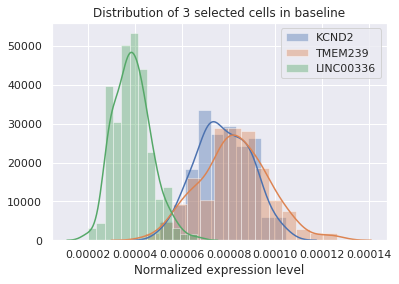

In [25]:
sns.distplot(df_ge_norm.iloc[(df_ge[df_ge['GeneID'] == 'KCND2'].index[0])], kde=True,label='KCND2');
sns.distplot(df_ge_norm.iloc[(df_ge[df_ge['GeneID'] == 'TMEM239'].index[0])], kde=True, label='TMEM239');
sns.distplot(df_ge_norm.iloc[(df_ge[df_ge['GeneID'] == 'LINC00336'].index[0])], kde=True, label='LINC00336');
plt.legend()
plt.xlabel('Normalized expression level')
plt.title('Distribution of 3 selected cells in baseline')

Text(0.5,1,'Distribution of 3 selected cells in metformin')

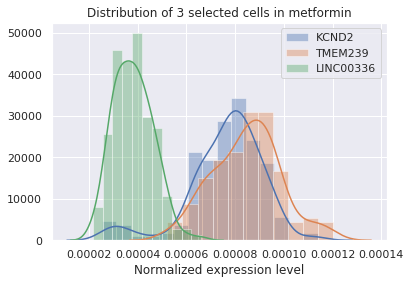

In [26]:
sns.distplot(df_gem_norm.iloc[(df_gem[df_gem['GeneID'] == 'KCND2'].index[0])], kde=True, label='KCND2');
sns.distplot(df_gem_norm.iloc[(df_gem[df_gem['GeneID'] == 'TMEM239'].index[0])], kde=True, label='TMEM239');
sns.distplot(df_gem_norm.iloc[(df_gem[df_gem['GeneID'] == 'LINC00336'].index[0])], kde=True, label='LINC00336');
plt.legend()
plt.xlabel('Normalized expression level')
plt.title('Distribution of 3 selected cells in metformin')

### The gene expression in metformin and baseline  looks quite similar and each specific cell approximately follows a normal curve. Mean expression level for TMEM239 and KCND2  locate close to each other. Mean LINC00336 for are much smaller than other two and less spread out.


### c)

### Though coming from two different datasets, the distribution of these three genes in two different data set are very similar

Text(0.5,1,'four selected cells distribution')

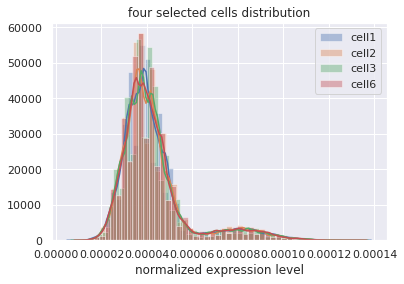

In [27]:
sns.distplot(df_ge_norm['BaselineCell_1'], kde=True, label='cell1');
sns.distplot(df_ge_norm['BaselineCell_2'], kde=True, label='cell2');
sns.distplot(df_gem_norm['MetforminCell_3'], kde=True,label='cell3');
sns.distplot(df_gem_norm['MetforminCell_6'], kde=True,label='cell6');
plt.legend()
plt.xlabel('normalized expression level')
plt.title('four selected cells distribution')


### The distribution follows very closely to Gaussian distribution, with a small noise at the end of right tail

## Task2

## Problem1

### a)

### It is a non-parametric test and we use them when we can not make an assumation(have no prior information) abot the distribution of data

### b)

In [28]:
from scipy import stats
ps = []
for i in range(len(df_ge_norm)):
    ps.append(stats.ks_2samp(df_ge_norm.iloc[i],df_gem_norm.iloc[i])[1])
ps = np.array(ps)

### c)

### The use of two-sample ks test is to test whether two data come from the same distribution. Specifically, if gene is KCND2, the null hypothesis is that the data from baseline and the data from merformin follows the same distribution

### d)

In [29]:
dic = {}
alpha = [0.1,0.05,0.01,0.005,0.001]
for a in alpha:
    dic[a] = np.sum(ps <= a)
df_p_true = pd.DataFrame(dic,index = ['observed # of significant data'])
df_p_true


,0.1,0.05,0.01,0.005,0.001
observed # of significant data,2257,1342,319,160,40


## Problem2

### )a

### 0.05 p value means that given baseline and metformin follows the same distribution, the probability that we would observe data like our data or more extreme(data that follows a more different distribution) is 0.05

### )b

### If null hypothesis is true, the p value would follow a uniform distribution under the interval [0,1]

### )c

In [30]:
# Based on b we know that p would follow a uniform distribution if gene's expression was not altered
dic = {}
for a in alpha:
    dic[a] = a * len(df_gem_norm)
df_p_exp = pd.DataFrame(dic,index = ['expected # of significant data'])
print(pd.concat([df_p_exp,df_p_true]))

                                 0.100   0.050   0.010   0.005   0.001
expected # of significant data  2334.6  1167.3  233.46  116.73  23.346
observed # of significant data  2257.0  1342.0  319.00  160.00  40.000


### )d

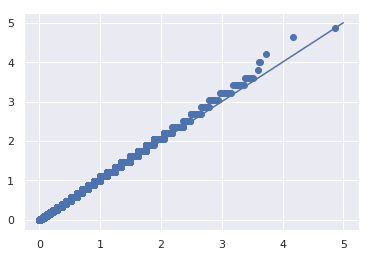

In [31]:
p_exp = np.sort(-np.log10(np.random.uniform(0,1,len(df_gem_norm))))
ps_log = np.sort(-np.log10(ps))
plt.scatter(x=p_exp,y = ps_log)
plt.plot(range(int(max((ps_log))) + 2),range(int(max(ps_log)) + 2))

### )e

### (1)By taking the negative log for each data, we can transform the tail of data in a more readable way(the range is too small but the amounts of data is large) without changing the relationship of them. if we do not take the log, the data would be clustered together and it's hard for us to spot any interesting patterns for the tail

### (2)Since the Q-Q plot approximately aligns with the x = y line, the observed p values behaves closely to expected p value under the assumption that the null is true; thus, the null hypothesis is concluded to be true; that is,  the gene's expression in baseline and in merformin follows the same distribution.

# Task 3

## problem 1

### a)

In [32]:
from sklearn.decomposition import PCA
df_ge_pca = df_ge_norm.values.T
pca_ge = PCA(svd_solver='full')
pca_ge.fit(df_ge_pca)
df_gem_pca = df_gem_norm.values.T
pca_gem = PCA(svd_solver='full')
pca_gem.fit(df_gem_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

### b)

Text(0.5,1,'scree plot for metformin')

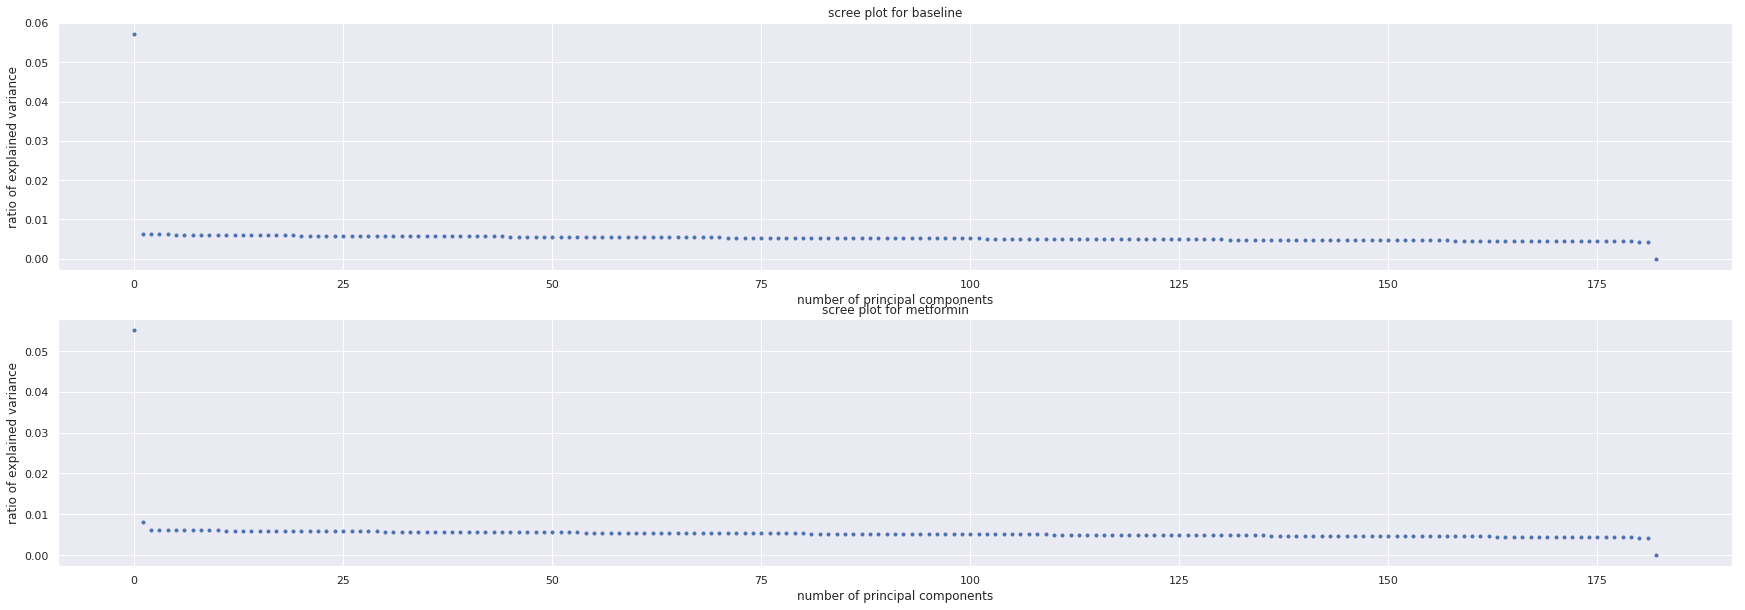

In [33]:
ge = pca_ge.explained_variance_ratio_
gem = (pca_gem.explained_variance_ratio_)
fig = plt.figure(figsize=(30,10))
plt.subplot(2,1,1)
plt.plot(ge,'.')
plt.title('scree plot for baseline')
plt.xlabel('number of principal components')
plt.ylabel('ratio of explained variance')
plt.subplot(2,1,2)
plt.plot(gem,'.')
plt.xlabel('number of principal components')
plt.ylabel('ratio of explained variance')
plt.title('scree plot for metformin')

In [34]:
np.argwhere(np.cumsum(ge) > 0.3)[1][0]

43

In [35]:
np.argwhere(np.cumsum(gem) > 0.3)[1][0]

43

### c)

Text(0,0.5,'second component')

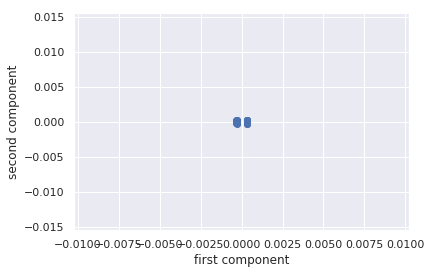

In [36]:
pca_ge = PCA(2,random_state=1)
transformed_ge = pca_ge.fit_transform(df_ge_pca)
plt.scatter(x = transformed_ge[:,0],y = transformed_ge[:,1])
plt.xlabel('first component')
plt.ylabel('second component')

### Based on the plot, the data for based line and metformin have two major clusters when we project them on 2D

Text(0,0.5,'second component')

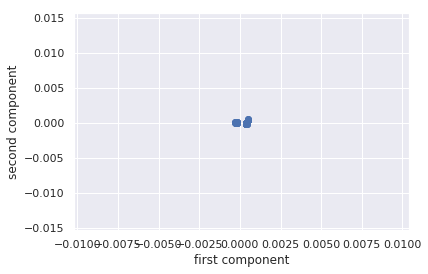

In [37]:
pca_gem = PCA(2,random_state=1)
transformed_gem = pca_gem.fit_transform(df_gem_pca)
plt.scatter(x = transformed_gem[:,0],y = transformed_gem[:,1])
plt.xlabel('first component')
plt.ylabel('second component')

## problem 2

### a)

In [38]:
from sklearn.manifold import TSNE
ge_embedded = TSNE(n_components=2).fit_transform(df_ge_pca)
gem_embedded = TSNE(n_components=2).fit_transform(df_gem_pca)

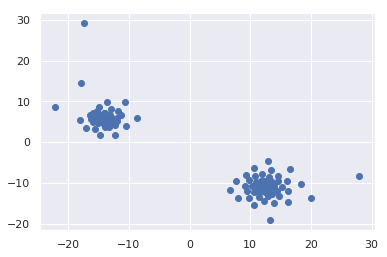

In [39]:
plt.scatter(x = ge_embedded[:,0],y = ge_embedded[:,1])

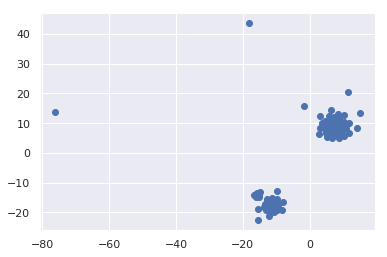

In [40]:
plt.scatter(x = gem_embedded[:,0],y = gem_embedded[:,1])

### Comments : Two major subpopulations are deteced here, but the scale is completely different, and there are sone outliers

### b) Both of them are able to distinguish two major subpopulations, but the scale of TSNE is much larger, and there are some outliers detected by TSNE while PCA do not

## problem 3

### a)

In [41]:
from sklearn.cluster import KMeans
Sum_of_gesquared_distances = []
Sum_of_gemsquared_distances = []
K = range(1,5)
for k in K:
    km1 = KMeans(n_clusters=k)
    km1 = km1.fit(transformed_ge)
    km2 = KMeans(n_clusters=k)
    km2 = km2.fit(transformed_gem)
    Sum_of_gesquared_distances.append(km1.inertia_)
    Sum_of_gemsquared_distances.append(km2.inertia_)

Text(0,0.5,'SSD')

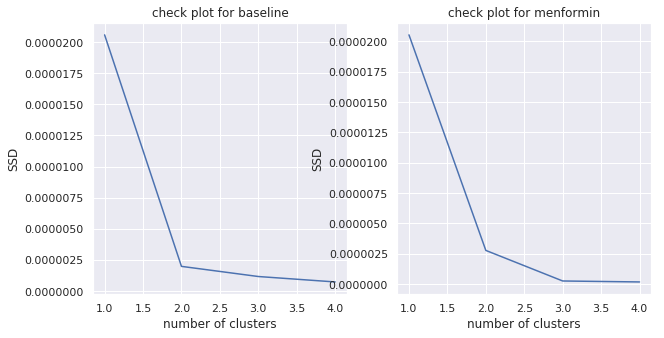

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(1,5),Sum_of_gesquared_distances,'-')
plt.title('check plot for baseline')
plt.xlabel('number of clusters')
plt.ylabel('SSD')
plt.subplot(1,2,2)
plt.plot(range(1,5),Sum_of_gemsquared_distances,'-')
plt.title('check plot for menformin')
plt.xlabel('number of clusters')
plt.ylabel('SSD')

### By elbow method, we found that the optimal number of clusters are 2 for both data set

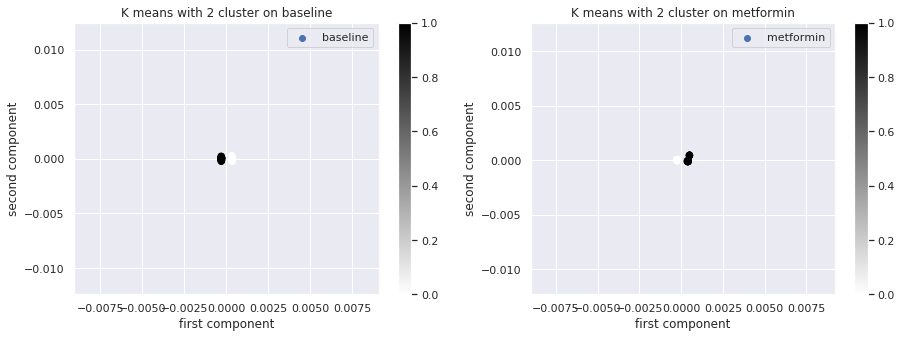

In [43]:
km1 = KMeans(n_clusters=2)
km1 = km1.fit(transformed_ge)
km2 = KMeans(n_clusters=2)
km2 = km2.fit(transformed_gem)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x = transformed_ge[:,0],y = transformed_ge[:,1],c = km1.labels_,cmap = 'binary',label = 'baseline')
plt.title('K means with 2 cluster on baseline')
plt.xlabel('first component')
plt.ylabel('second component')
plt.colorbar()
plt.legend()
plt.subplot(1,2,2)
plt.scatter(x = transformed_gem[:,0],y = transformed_gem[:,1],c = km2.labels_,cmap = 'binary',label = 'metformin')
plt.title('K means with 2 cluster on metformin')
plt.xlabel('first component')
plt.ylabel('second component')
plt.legend()
plt.colorbar()

### b)

Text(0,0.5,'BIC')

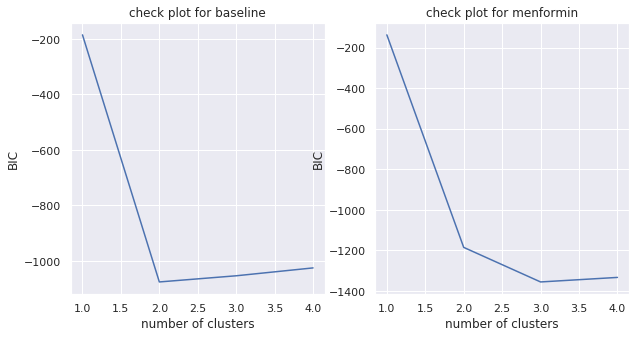

In [44]:
from sklearn.mixture import GaussianMixture
Sum_of_gesquared_distances = []
Sum_of_gemsquared_distances = []
K = range(1,5)
for k in K:
    gm1 = GaussianMixture(n_components=k)
    gm1 = gm1.fit(transformed_ge * 1000)
    gm2 = GaussianMixture(n_components=k)
    gm2 = gm2.fit(transformed_gem * 1000)
    Sum_of_gesquared_distances.append(gm1.bic(transformed_ge * 1000))
    Sum_of_gemsquared_distances.append(gm2.bic(transformed_gem * 1000))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(1,5),Sum_of_gesquared_distances,'-')
plt.title('check plot for baseline')
plt.xlabel('number of clusters')
plt.ylabel('BIC')
plt.subplot(1,2,2)
plt.plot(range(1,5),Sum_of_gemsquared_distances,'-')
plt.title('check plot for menformin')
plt.xlabel('number of clusters')
plt.ylabel('BIC')

### Based on BIC information, we can conclude that there would be 2 clusters for baseline and 3 for metformin

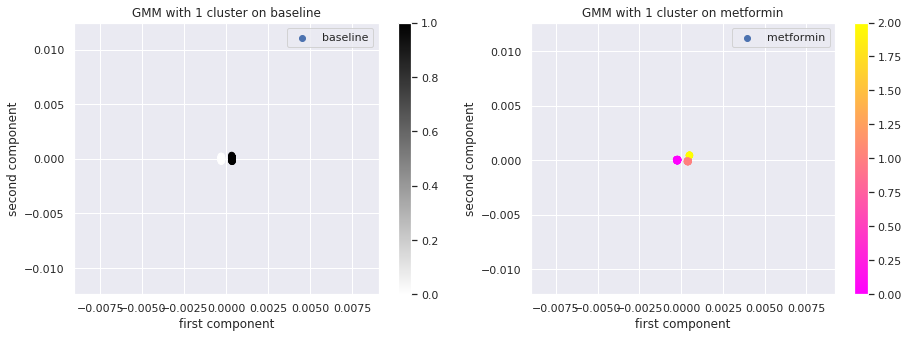

In [45]:
gm1 = GaussianMixture(n_components=2)
gm1 = gm1.fit(transformed_ge * 1000)
gm2 = GaussianMixture(n_components=3)
gm2 = gm2.fit(transformed_gem * 1000)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x = transformed_ge[:,0],y = transformed_ge[:,1],c = gm1.predict(transformed_ge * 1000),cmap = 'binary',label = 'baseline')
plt.title('GMM with 1 cluster on baseline')
plt.legend()
plt.colorbar()
plt.xlabel('first component')
plt.ylabel('second component')
plt.subplot(1,2,2)
plt.scatter(x = transformed_gem[:,0],y = transformed_gem[:,1],c = gm2.predict(transformed_gem * 1000),cmap = 'spring',label = 'metformin')
plt.title('GMM with 1 cluster on metformin')
plt.xlabel('first component')
plt.ylabel('second component')
plt.legend()
plt.colorbar()

### c)

In [46]:
from sklearn.cluster import AgglomerativeClustering

### from the 2D representation of both data set, there seems to be two clusters for both of them, thus, I choose 2 clusters for both of them in Hierachical clustering

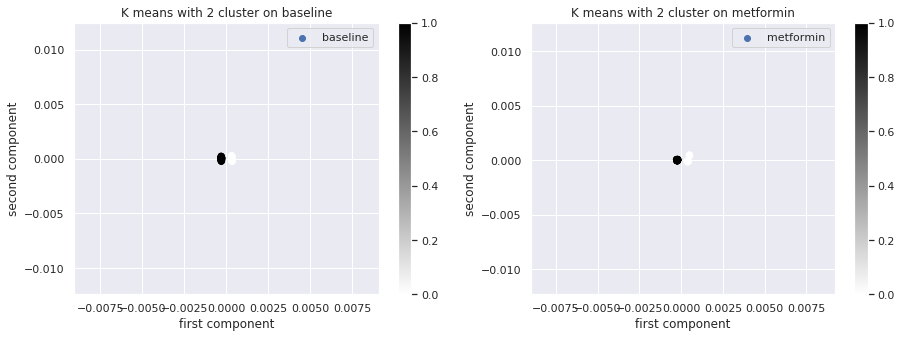

In [47]:
cluster1 = AgglomerativeClustering(2,linkage='single').fit_predict(transformed_ge)
cluster2 = AgglomerativeClustering(2,linkage = 'single').fit_predict(transformed_gem)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x = transformed_ge[:,0],y = transformed_ge[:,1],c = cluster1,cmap = 'binary',label = 'baseline')
plt.title('K means with 2 cluster on baseline')
plt.xlabel('first component')
plt.ylabel('second component')
plt.colorbar()
plt.legend()
plt.subplot(1,2,2)
plt.scatter(x = transformed_gem[:,0],y = transformed_gem[:,1],c = cluster2,cmap = 'binary',label = 'metformin')
plt.title('K means with 2 cluster on metformin')
plt.xlabel('first component')
plt.ylabel('second component')
plt.legend()
plt.colorbar()

### d) The clusters given by K means, GMM, and single linkage hireachical clustering is the same for baseline data set. For metformin data set, the K means and SLHC have the same clusters, GMM have 3 three clusters and are different from the other 2. This is because we use different methods to choose the optimal number of clusters. I picked K means for the remaining analysis

# Task4

## probelm 1

### a)

In [48]:
km1 = KMeans(n_clusters=2,random_state=1)
km1 = km1.fit(transformed_ge)
km2 = KMeans(n_clusters=2,random_state=1)
km2 = km2.fit(transformed_gem)
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]
km1_0 = ClusterIndicesNumpy(0,km1.labels_)
km1_1 = ClusterIndicesNumpy(1,km1.labels_)
km2_0 = ClusterIndicesNumpy(0,km2.labels_)
km2_1 = ClusterIndicesNumpy(1,km2.labels_)
df_ge_ori = pd.read_csv('GeneExpression_Baseline.csv')
df_gem_ori = pd.read_csv('GeneExpression_Metformin.csv')
df_ge_norm = df_ge_ori[df_ge_ori.columns[5:]].div(df_ge_ori[df_ge_ori.columns[5:]].sum(axis=0), axis=1)
df_ge_norm = df_ge_ori[df_ge_ori.columns[5:]].div(df_ge_ori[df_ge_ori.columns[5:]].sum(axis=0), axis=1)
ge_ori = df_ge_norm[df_ge_ori.columns[5:]].values.T
gem_ori = df_ge_norm[df_ge_ori.columns[5:]].values.T
ge_clu1 = ge_ori[km1_0]
ge_clu2 = ge_ori[km1_1]
gem_clu1 = ge_ori[km2_0]
gem_clu2 = ge_ori[km2_1]

In [49]:
ks_1_1 = []
ks_1_2 = []
ks_2_1 = []
ks_2_2 = []
for i in range(ge_ori.shape[1]):
    ks_1_1.append(stats.ks_2samp(gem_clu1[:,i],ge_clu1[:,i])[1])
    ks_1_2.append(stats.ks_2samp(gem_clu1[:,i],ge_clu2[:,i])[1])
    ks_2_1.append(stats.ks_2samp(gem_clu2[:,i],ge_clu1[:,i])[1])
    ks_2_2.append(stats.ks_2samp(gem_clu2[:,i],ge_clu2[:,i])[1])
ks_1_1 = np.array(ks_1_1)
ks_1_2 = np.array(ks_1_2)
ks_2_1 = np.array(ks_2_1)
ks_2_2 = np.array(ks_2_2)

In [50]:
dic_11 = {}
dic_12 = {}
dic_21 = {}
dic_22 = {}
alpha = [0.05,0.01,0.005,0.001]
for a in alpha:
    dic_11[a] = np.sum(ks_1_1 <= a)
    dic_12[a] = np.sum(ks_1_2 <= a)
    dic_21[a] = np.sum(ks_2_1 <= a)
    dic_22[a] = np.sum(ks_2_2 <= a)
df_11 = pd.DataFrame(dic_11,index = ['observed # of significant data for cluster 1 in metformin compared with cluster 1 in baseline'])
df_12 = pd.DataFrame(dic_12,index = ['observed # of significant data for cluster 1 in metformin compared with cluster 2 in baseline'])
df_21 = pd.DataFrame(dic_21,index = ['observed # of significant data for cluster 2 in metformin compared with cluster 1 in baseline'])
df_22 = pd.DataFrame(dic_22,index = ['observed # of significant data for cluster 2 in metformin compared with cluster 2 in baseline'])
dic = {}
for a in alpha:
    dic[a] = a * df_gem_norm.shape[0]
df_p_exp = pd.DataFrame(dic,index = ['expected # of significant data'])
print(pd.concat([df_p_exp,df_11,df_12,df_21,df_22]))

                                                     0.050    0.010    0.005  \
expected # of significant data                      1167.3   233.46   116.73   
observed # of significant data for cluster 1 in...  1297.0   851.00   687.00   
observed # of significant data for cluster 1 in...  1562.0  1144.00  1003.00   
observed # of significant data for cluster 2 in...  1460.0   897.00   735.00   
observed # of significant data for cluster 2 in...  1247.0   712.00   572.00   

                                                      0.001  
expected # of significant data                       23.346  
observed # of significant data for cluster 1 in...  417.000  
observed # of significant data for cluster 1 in...  718.000  
observed # of significant data for cluster 2 in...  440.000  
observed # of significant data for cluster 2 in...  329.000  


### I used the expected number of significant data if the null hypothesis is true as in Task 2 to construct a table for comparison

### Based on this table, both cluster are affected by metformin as they are siginificanly higher than what is expected

## b)

### Based on same table as in a) , we can see that the cluster1(clusrer labelled as 0, which is the white cluster in the previous graph) from metformin is closer to the cluster1 in baseline than cluster2(cluster labelled as 1, which is the black cluster in the previous graph), since it has less number of significant data for all levels of significance I choose, and the cluster2 from metformin is closer to the cluster2 in baseline for the same reason

### c)

In [51]:
arg_1 = np.where(ks_1_1 < 0.0000025)
arg_2 = np.where(ks_2_2 < 0.0000025)
print(df_ge['GeneID'].values[arg_1])
print(df_ge['GeneID'].values[arg_2])
genes1 = df_ge['GeneID'].values[arg_1]
genes2 = df_ge['GeneID'].values[arg_2]

['OMA1' 'IDI1' 'A2M' 'SRSF9' 'DHRS4' 'NUMB' 'SNX29' 'ZNF207' 'NMT1' 'CST1'
 'KRTAP6-2' 'GSTTP1' 'RFPL3' 'CRYGS' 'FKBP9']
['IDI1' 'SNX29']


## problem2

### a)

In [52]:
dic = {}
with open("PathwayDictionary.txt") as file: # Use file to refer to the file object
    data = file.readlines()
    for d in data:
        sp = d.split(':')
        dic[sp[0]] = sp[1].strip('\n').split(',')

In [53]:
dic_count = {}
for k,v in dic.items():
    for j in genes1:
        if(j in v):
            if(k in dic_count):
                dic_count[k] +=1 
            else:
                dic_count[k] = 1 


In [54]:
sorted(dic_count.items(), key=lambda x: x[1])[::-1]

[('Heterotrimeric G-protein signaling pathway-rod outer segment phototransduction',
  3),
 ('Tyrosine biosynthesis', 2),
 ('Salvage pyrimidine ribonucleotides', 2),
 ('Pentose phosphate pathway', 2),
 ('PDGF signaling pathway', 2),
 ('Insulin/IGF pathway-mitogen activated protein kinase kinase/MAP kinase cascade',
  2),
 ('FAS signaling pathway', 2),
 ('Aminobutyrate degradation', 2),
 ('Xanthine and guanine salvage pathway', 1),
 ('Wnt signaling pathway', 1),
 ('VEGF signaling pathway', 1),
 ('Valine biosynthesis', 1),
 ('Thyrotropin-releasing hormone receptor signaling pathway', 1),
 ('Thiamin biosynthesis', 1),
 ('Salvage pyrimidine deoxyribonucleotides', 1),
 ('Ras Pathway', 1),
 ('Pyrimidine Metabolism', 1),
 ('PRPP biosynthesis', 1),
 ('Proline biosynthesis', 1),
 ('Phenylalanine biosynthesis', 1),
 ('p53 pathway by glucose deprivation', 1),
 ('p38 MAPK pathway', 1),
 ('Opioid proopiomelanocortin pathway', 1),
 ('Nicotine degradation', 1),
 ('MYO signaling pathway', 1),
 ('Muscar

### The most common pathways is Heterotrimeric G-protein signaling pathway-rod outer segment phototransduction with an occurrance of 3

### b)

In [55]:
dic_exist = {}
for k,v in dic.items():
    for j in genes1:
        if(j in v):
            dic_exist[j] = True
set(dic_exist.keys()) == set(genes1)

True

### Since they are the same, there are not any novel genes